手写决策树

In [102]:
#!/usr/bin/env python
#coding=utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
from math import log
from __future__ import division

def create_data():
    datasets = [['青年', '否', '否', '一般', '否'],
               ['青年', '否', '否', '好', '否'],
               ['青年', '是', '否', '好', '是'],
               ['青年', '是', '是', '一般', '是'],
               ['青年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '好', '否'],
               ['中年', '是', '是', '好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '好', '是'],
               ['老年', '是', '否', '好', '是'],
               ['老年', '是', '否', '非常好', '是'],
               ['老年', '否', '否', '一般', '否'],
               ]
    labels = [u'年龄', u'有工作', u'有自己的房子', u'信贷情况', u'类别']
    return datasets, labels
datasets, labels = create_data()
data = pd.DataFrame(datasets, columns=labels)

<img src='ent.png'>

In [132]:
def cal_ent(datasets):
    label_count = {}
    data_length = len(datasets)
    for i in range(data_length):
        label = datasets[i][-1]
        label_count[label] = label_count.get(label, 0) + 1
    ent = sum([(float(i)/float(data_length))*log(float(i)/float(data_length), 2) for i in label_count.values()])
    return -ent

<img src='cond_ent.png'>

In [131]:
def cond_ent(datasets, axis=0):
    feature_sets = {}
    data_length = len(datasets)
    for i in xrange(data_length):
        feature = datasets[i][axis]
        feature_sets[feature] = feature_sets.get(feature, []) + [datasets[i]]
    cond_ent = sum([(float(len(i))/float(data_length))*cal_ent(i) for i in feature_sets.values()])
    return cond_ent

<img src='info_gain.png'>

In [133]:
def info_gain(end, cond_ent):
    return end - cond_ent

In [138]:
import sys,os
reload(sys)
sys.setdefaultencoding('utf8')
def info_gain_train(datasets):
    count = len(datasets[0]) - 1
    ent = cal_ent(datasets)
    best_feature = []
    for c in xrange(count):
        c_info_gain = info_gain(ent, cond_ent(datasets, axis=c))
        best_feature.append((c, c_info_gain))
        print '特征({}) - info_gain[{:.3f}]'.format(labels[c], c_info_gain)
    best_ = max(best_feature, key=lambda x: x[-1])
    print '特征({})的信息增益最大，选择为根节点特征'.format(labels[best_[0]])
    return best_feature
info_gain_train(np.array(datasets))

https://github.com/wzyonggege/statistical-learning-method/blob/master/DecisonTree/DT.ipynb

In [1]:
# 4.3 分类分析
# 导入库
import numpy as np  # 导入numpy库
from sklearn.model_selection import train_test_split  # 数据分区库
from sklearn import tree  # 导入决策树库
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, \
    roc_curve  # 导入指标库
import prettytable  # 导入表格库
import pydotplus  # 导入dot插件库
import matplotlib.pyplot as plt  # 导入图形展示库

In [3]:
# 数据准备
raw_data = np.loadtxt('classification.csv', delimiter=',', skiprows=1, )  # 读取数据文件
X = raw_data[:, :-1]  # 分割X
y = raw_data[:, -1]  # 分割y
X_train, X_test, y_train, y_test = train_test_split(X, y, 
        test_size=.3, random_state=0)  # 将数据分为训练集和测试集

In [4]:
# 训练分类模型
model_tree = tree.DecisionTreeClassifier(random_state=0)  # 建立决策树模型对象
model_tree.fit(X_train, y_train)  # 训练决策树模型
pre_y = model_tree.predict(X_test)  # 使用测试集做模型效果检验

In [5]:
# 输出模型概况
n_samples, n_features = X.shape  # 总样本量,总特征数
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线

samples: 21927 	 features: 4
----------------------------------------------------------------------


In [50]:
# 混淆矩阵
confusion_m = confusion_matrix(y_test, pre_y)  # 获得混淆矩阵
confusion_matrix_table = prettytable.PrettyTable()  # 创建表格实例
confusion_matrix_table.add_row(confusion_m[0, :])  # 增加第一行数据
confusion_matrix_table.add_row(confusion_m[1, :])  # 增加第二行数据
print ('confusion matrix')
print (confusion_matrix_table)  # 打印输出混淆矩阵

confusion matrix
+---------+---------+
| Field 1 | Field 2 |
+---------+---------+
|   5615  |   284   |
|   321   |   359   |
+---------+---------+


In [7]:
# 核心评估指标
y_score = model_tree.predict_proba(X_test)  # 获得决策树的预测概率
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])  # ROC
auc_s = auc(fpr, tpr)  # AUC
accuracy_s = accuracy_score(y_test, pre_y)  # 准确率
precision_s = precision_score(y_test, pre_y)  # 精确度
recall_s = recall_score(y_test, pre_y)  # 召回率
f1_s = f1_score(y_test, pre_y)  # F1得分
core_metrics = prettytable.PrettyTable()  # 创建表格实例
core_metrics.field_names = ['auc', 'accuracy', 'precision', 'recall', 'f1']  # 定义表格列名
core_metrics.add_row([auc_s, accuracy_s, precision_s, recall_s, f1_s])  # 增加数据
print ('core metrics')
print (core_metrics)  # 打印输出核心评估指标

core metrics
+----------------+----------------+---------------+----------------+----------------+
|      auc       |    accuracy    |   precision   |     recall     |       f1       |
+----------------+----------------+---------------+----------------+----------------+
| 0.749870117567 | 0.908040735674 | 0.55832037325 | 0.527941176471 | 0.542705971277 |
+----------------+----------------+---------------+----------------+----------------+


In [8]:
# 模型效果可视化
names_list = ['age', 'gender', 'income', 'rfm_score']  # 分类模型维度列表
color_list = ['r', 'c', 'b', 'g']  # 颜色列表
plt.figure()  # 创建画布

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

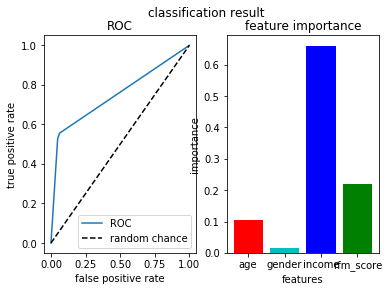

In [9]:
# 子网格1：ROC曲线
plt.subplot(1, 2, 1)  # 第一个子网格
plt.plot(fpr, tpr, label='ROC')  # 画出ROC曲线
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='random chance')  # 画出随机状态下的准确率线
plt.title('ROC')  # 子网格标题
plt.xlabel('false positive rate')  # X轴标题
plt.ylabel('true positive rate')  # y轴标题
plt.legend(loc=0)
# 子网格2：指标重要性
feature_importance = model_tree.feature_importances_  # 获得指标重要性
plt.subplot(1, 2, 2)  # 第二个子网格
plt.bar(np.arange(feature_importance.shape[0]), feature_importance, tick_label=names_list, color=color_list)  # 画出条形图
plt.title('feature importance')  # 子网格标题
plt.xlabel('features')  # x轴标题
plt.ylabel('importance')  # y轴标题
plt.suptitle('classification result')  # 图形总标题
plt.show()  # 展示图形

In [10]:
# 保存决策树规则图为PDF文件
dot_data = tree.export_graphviz(model_tree, out_file=None, max_depth=5, feature_names=names_list, filled=True,
                                rounded=True)  # 将决策树规则生成dot对象
graph = pydotplus.graph_from_dot_data(dot_data)  # 通过pydotplus将决策树规则解析为图形
graph.write_pdf("tree.pdf")  # 将决策树规则保存为PDF文件

True

In [48]:
# 模型应用
X_new = [[40, 0, 55616, 0], [17, 0, 55568, 0], [55, 1, 55932, 1]]
print ('classification prediction')
for i, data in enumerate(X_new):
    data = np.array(data).reshape((1,len(data)))
    y_pre_new = model_tree.predict(data)
    print ('classification for %d record is: %d' % (i + 1, y_pre_new))

classification prediction
classification for 1 record is: 0
classification for 2 record is: 0
classification for 3 record is: 1
